### Load speech data and store in pickle

In [40]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

In [12]:
# Load the .mat file
filename = 'speech_data.mat'
mat = loadmat(filename)
resp = mat['resp']
stim = mat['stim']
fs = mat['fs']

In [11]:
print(resp.shape)
print(stim.shape)

(15354, 128)
(15354, 16)


In [ ]:
# Save the data in pickle format

fn = os.path.basename(filename) # remove path
fn = os.path.splitext(fn)[0] # remove the extension

speech_data = {
    'fs': fs,
    'stim': stim,
    'resp': resp,
}

with open(fn + '.pkl', 'wb') as file:
    pickle.dump(speech_data,file)

### Load example stimulus from Natural Speech dataset

In [2]:
natspeech_pth = 'data/'
natspeech_fn = 'dataStim.mat'

ns_mat = loadmat(natspeech_pth + '\\' + natspeech_fn)


In [34]:
print(ns_mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Jul 16 14:46:43 2022', '__version__': '1.0', '__globals__': [], 'stim': array([[(array([[array(['Speech Envelope Vectors'], dtype='<U23'),
                array(['Word Onset Vectors'], dtype='<U18'),
                array(['Spectrogram'], dtype='<U11'),
                array(['Phonetic Features'], dtype='<U17')]], dtype=object), array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                17, 18, 19, 20]], dtype=uint8), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
              dtype=uint8), array([[array(['Listening'], dtype='<U9')]], dtype=object), array([[128]], dtype=uint8), array([[array([[ 2.01354510e-06],
                       [ 8.14769857e-06],
                       [ 1.44840123e-05],
                       ...,
                       [ 1.84308192e-05],
                       [ 1.03744982e-05],
                       [-2.17564161e-06]]), array([[8.12183

In [37]:
ns_stim = ns_mat['stim'][0][0][5] # display stimulus values
for n in ns_stim:
    print(n.shape)

(20,)
(20,)
(20,)
(20,)


20
22729
23130
23050
23213
23082
25873
21213
21899
22521
24699
22473
23011
23451
22839
23469
23822
23998
23189
22711
24200


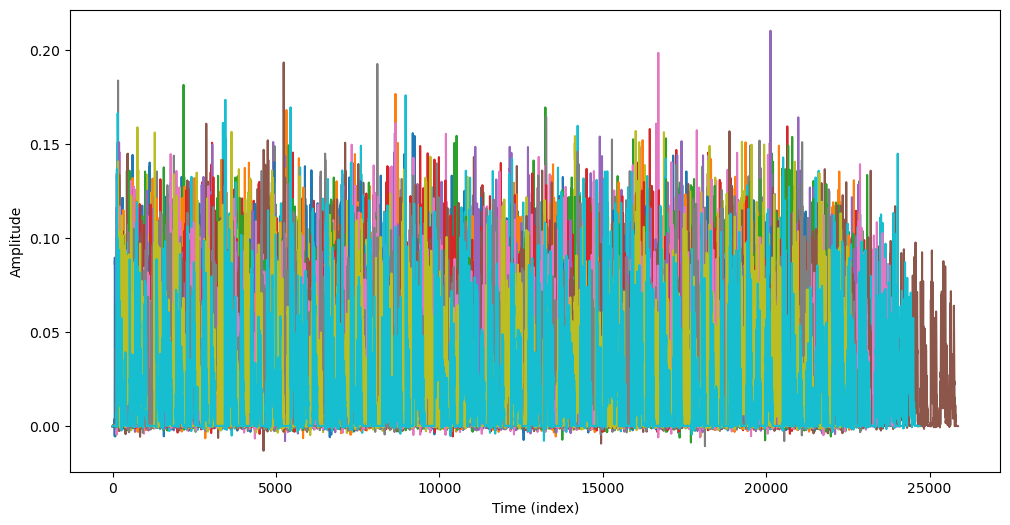

In [33]:
cont_vals = ns_mat['stim'][0][0][5][0]
print(len(cont_vals))

fig, ax = plt.subplots(figsize=(12,6))
for n in cont_vals:
    ax.plot(n)
    print(len(n))

ax.set_xlabel('Time (index)')
ax.set_ylabel('Amplitude')
plt.show()

In [38]:
# Get the important variables
fs = ns_mat['stim'][0][0][4][0][0] # sampling rate of the stimuli
envelope = ns_stim[0]
word_vec = ns_stim[1]
spectrogram = ns_stim[2]
phonetic_features = ns_stim[3]

In [41]:
save_fn = 'natural_speech_stim'

data = {
    'fs': fs,
    'envelope': envelope,
    'word_vec': word_vec,
    'spectrogram': spectrogram,
    'ph_features': phonetic_features
}

with open(save_fn + '.pkl', 'wb') as file:
    pickle.dump(data,file)